# Import the librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
%matplotlib inline

# ETL process

In [2]:
#Training data
df_entrenamiento = pd.read_excel('data_PQL.xlsx')
#Prediction data
df_predict = pd.read_excel('data_PQLpredict.xlsx')
df_entrenamiento.head(5)

,starts_2day,starts_4day,starts_6day,starts_8day,starts_10day,starts_12day,starts_14day,starts_16day,starts_18day,starts_20day,...,countsum_USER_ERROR,countsum_OPERATOR_EXCEPTION,countsum_STOPPED,failure_ratio,runtime_exception_ratio,user_error_ratio,operator_exception_ratio,stopped_ratio,IsWon,id
0,15,17,17,18,18,18,19,19,19,19,...,9.0,5.0,24.0,0.021021,0.007007,0.009009,0.005005,0.024024,True,1
1,4,4,4,4,4,4,4,4,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
2,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,3
3,2,3,3,3,3,3,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,5
4,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,6


note: IsWon indicate if the customer bought (True) or not (False) the software

In [3]:
#Null values verification
df_entrenamiento.isnull().sum()

starts_2day                   0
starts_4day                   0
starts_6day                   0
starts_8day                   0
starts_10day                  0
                           ... 
user_error_ratio            192
operator_exception_ratio    192
stopped_ratio               192
IsWon                         0
id                            0
Length: 308, dtype: int64

                       starts_2day  starts_4day  starts_6day  starts_8day  \
starts_2day               1.000000     0.910913     0.852572     0.839992   
starts_4day               0.910913     1.000000     0.985962     0.968614   
starts_6day               0.852572     0.985962     1.000000     0.987964   
starts_8day               0.839992     0.968614     0.987964     1.000000   
starts_10day              0.831787     0.953016     0.972470     0.991986   
starts_12day              0.811691     0.934911     0.957840     0.982129   
starts_14day              0.791734     0.906727     0.931808     0.963678   
starts_16day              0.772362     0.879640     0.904924     0.943404   
starts_18day              0.762802     0.871329     0.897021     0.936706   
starts_20day              0.748934     0.854099     0.881439     0.924758   
starts_22day              0.731437     0.832637     0.860296     0.906433   
starts_24day              0.717080     0.815205     0.843224     0.891567   

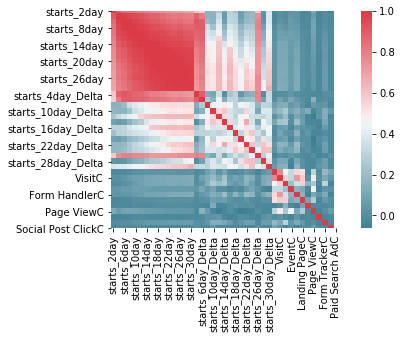

In [4]:
#Correlation verefication with pearson and seaborn heatmap

corr = df_entrenamiento.iloc[:,0:46].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True)
print(corr)
print(df_entrenamiento.iloc[:,0:46].corr(method = 'pearson'))

In [5]:
#Interpolate method to replace null values 
df_entrenamiento = df_entrenamiento.interpolate()

#drop the columns that we will not use  
df_entrenamientofinal = df_entrenamiento.drop(['country','industry','job_function','job_title'], axis=1)

#Drop de correlation columns (start_date) and keep Start_Date_delta
df_entrenamientofinal = df_entrenamientofinal.drop(df_entrenamientofinal.iloc[:,0:15], axis=1)
df_entrenamientofinal

,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,starts_20day_Delta,starts_22day_Delta,...,countsum_USER_ERROR,countsum_OPERATOR_EXCEPTION,countsum_STOPPED,failure_ratio,runtime_exception_ratio,user_error_ratio,operator_exception_ratio,stopped_ratio,IsWon,id
0,2,0,1,0,0,1,0,0,0,0,...,9.000000,5.000000,24.0,0.021021,0.007007,0.009009,0.005005,0.024024,True,1
1,0,0,0,0,0,0,0,1,0,0,...,9.333333,4.666667,22.4,0.031741,0.006540,0.020530,0.004671,0.022422,False,2
2,0,0,0,0,0,0,0,0,0,0,...,9.666667,4.333333,20.8,0.042461,0.006073,0.032050,0.004338,0.020821,False,3
3,1,0,0,0,0,0,0,0,0,0,...,10.000000,4.000000,19.2,0.053180,0.005606,0.043571,0.004004,0.019219,True,5
4,0,0,0,0,0,0,0,0,0,0,...,10.333333,3.666667,17.6,0.063900,0.005138,0.055091,0.003670,0.017618,True,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2,0,6,0,3,2,7,0,4,2,...,14.000000,0.000000,1.0,0.018642,0.000000,0.018642,0.000000,0.001332,True,327
278,0,0,0,0,0,0,0,0,0,0,...,13.500000,0.000000,0.5,0.045371,0.015674,0.029697,0.000000,0.000666,False,328
279,3,0,2,3,2,0,0,0,1,0,...,13.000000,0.000000,0.0,0.072100,0.031348,0.040752,0.000000,0.000000,False,329
280,0,0,3,3,0,9,5,1,1,2,...,26.000000,0.000000,1.0,0.016373,0.003778,0.016373,0.000000,0.000630,True,330


In [6]:
#Choose the target variable (IsWon) and features variables. 
labels = np.array(df_entrenamientofinal['IsWon'])
features = df_entrenamientofinal.drop('IsWon', axis=1)
features = np.array(features)

In [7]:
#Divide the dataset for training and test 
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 15)

In [8]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (225, 288)
Training Labels Shape: (225,)
Testing Features Shape: (57, 288)
Testing Labels Shape: (57,)


# Model Accuracy(Random Forest Classifier y Logistic Regression)

Random Forest Classifier

In [9]:
#Import the model
from sklearn import model_selection
#Create random forest Classification model
rfc = RandomForestClassifier()
#Training the model
rfc.fit(train_features,train_labels)
# Model accuracy
rfc_pred = rfc.predict (test_features)
accuracy_score (test_labels, rfc_pred)
confusion_matrix(test_labels,rfc_pred)
print(confusion_matrix(test_labels, rfc_pred ))
print(accuracy_score (test_labels, rfc_pred));

[[22  9]
 [12 14]]
0.631578947368421


D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Logistic Regression

In [10]:
#Create Logistic Regression
LG_model = LogisticRegression()

#Training the model
LG_model.fit(train_features, train_labels)

#Model accuracy 
LG_pred = LG_model.predict(test_features)
print(confusion_matrix(test_labels, LG_pred ))
print(accuracy_score (test_labels, LG_pred))


[[25  6]
 [ 9 17]]
0.7368421052631579


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Once we train the model and tested we use to predict the predict dataset

In [11]:
#Create IsWon column
df_predict['IsWon'] = bool

#drop Unnamed: 306 column
df_predict = df_predict.drop(['Unnamed: 306'], axis=1)

#replace null values with interpolate method
df_predict = df_predict.interpolate()
df_predict = df_predict.interpolate(limit_direction ='backward')
df_predict.iloc[:, 46:]

#Drop the unnecesary columns
df_predictfinal = df_predict.drop(['country','industry','job_function','job_title'], axis=1)

#Drop correleted columns
df_predictfinal = df_predictfinal.drop(df_predictfinal.iloc[:,0:15], axis=1)
df_predictfinal



,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,starts_20day_Delta,starts_22day_Delta,...,countsum_USER_ERROR,countsum_OPERATOR_EXCEPTION,countsum_STOPPED,failure_ratio,runtime_exception_ratio,user_error_ratio,operator_exception_ratio,stopped_ratio,id,IsWon
0,0,0,1,0,0,0,0,2,0,0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400,<class 'bool'>
1,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,401,<class 'bool'>
2,1,0,0,0,0,1,0,0,0,0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,402,<class 'bool'>
3,0,0,0,0,0,8,3,1,0,0,...,13.000000,0.25,0.000000,0.002472,0.000090,0.002337,0.000045,0.000000,403,<class 'bool'>
4,0,0,0,0,0,0,0,0,0,0,...,26.000000,0.50,0.000000,0.004943,0.000180,0.004674,0.000090,0.000000,404,<class 'bool'>
5,2,0,0,0,0,0,0,0,0,0,...,39.000000,0.75,0.000000,0.007415,0.000270,0.007011,0.000135,0.000000,405,<class 'bool'>
6,1,8,9,0,0,0,0,0,1,0,...,52.000000,1.00,0.000000,0.009887,0.000360,0.009347,0.000180,0.000000,406,<class 'bool'>
7,0,8,1,0,0,0,0,0,0,0,...,47.000000,0.80,0.200000,0.016762,0.000288,0.016330,0.000144,0.000328,407,<class 'bool'>
8,0,0,0,1,0,0,0,0,1,0,...,42.000000,0.60,0.400000,0.023637,0.000216,0.023313,0.000108,0.000656,408,<class 'bool'>
9,0,0,0,0,0,0,0,0,0,0,...,37.000000,0.40,0.600000,0.030512,0.000144,0.030296,0.000072,0.000984,409,<class 'bool'>


Important: Both dataset need to have the same number of columns

In [12]:
#Use features Variables to predict model 
X_predict = df_predictfinal.drop('IsWon', axis= 1)
#Use Logistic Regression model to predict because his better accuracy  
LG_prediction = LG_model.predict ( X_predict)
LG_prediction

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False])

In [16]:
#Prediction to dataframe.
LG_predictiondf = pd.DataFrame(LG_prediction)
#Duplicate the dataframe to futher use 
df_predictfinal_lg = df_predictfinal
#Fill the column IsWon with predicted values 
df_predictfinal_lg['IsWon'] = LG_predictiondf
#Append the other columns we will use for further analysis 
df_predictfinal_lg['country'] = df_predict['country']
df_predictfinal_lg['industry'] = df_predict['industry']
df_predictfinal_lg['job_function'] = df_predict['job_function']
df_predictfinal_lg['job_title'] = df_predict['job_title']

In [17]:
#Check dataframe
df_predictfinal_lg

,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,starts_20day_Delta,starts_22day_Delta,...,runtime_exception_ratio,user_error_ratio,operator_exception_ratio,stopped_ratio,id,IsWon,country,industry,job_function,job_title
0,0,0,1,0,0,0,0,2,0,0,...,0.000000,0.000000,0.000000,0.000000,400,False,Malaysia,Healthcare/Pharmaceuticals/Biotech,Data Scientist,Executive Director
1,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.000000,0.000000,0.000000,401,False,Switzerland,Financial Services,IT-Architect,Data Scientist/ consultant
2,1,0,0,0,0,1,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,402,False,United Kingdom,Energy/Utilities,IT-Architect,Data Scientist/ consultant
3,0,0,0,0,0,8,3,1,0,0,...,0.000090,0.002337,0.000045,0.000000,403,False,Singapore,Education,Other,Data Scientist/ consultant
4,0,0,0,0,0,0,0,0,0,0,...,0.000180,0.004674,0.000090,0.000000,404,False,United States,Other,Data Scientist,Data Scientist/ consultant
5,2,0,0,0,0,0,0,0,0,0,...,0.000270,0.007011,0.000135,0.000000,405,False,Sweden,Media/Entertainment,Consultant,Data Scientist/ consultant
6,1,8,9,0,0,0,0,0,1,0,...,0.000360,0.009347,0.000180,0.000000,406,False,United States,Government - Federal,IT-Data Scientist,Mr.
7,0,8,1,0,0,0,0,0,0,0,...,0.000288,0.016330,0.000144,0.000328,407,False,Netherlands,Healthcare/Pharmaceuticals/Biotech,IT-Architect,Data Scientist/ consultant
8,0,0,0,1,0,0,0,0,1,0,...,0.000216,0.023313,0.000108,0.000656,408,False,Netherlands,Healthcare/Pharmaceuticals/Biotech,Other,Data Scientist/ consultant
9,0,0,0,0,0,0,0,0,0,0,...,0.000144,0.030296,0.000072,0.000984,409,False,United Kingdom,Financial Services,IT-Data Scientist,Data Scientist/ consultant


In [18]:
#Final Dataframe to CSV
df_predictfinal_lg.to_csv('Prediction.csv')